In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from linearRegression import LinearRegression

In [2]:
duong_dan = 'car_detail_en.csv'

In [3]:
df = pd.read_csv(duong_dan)

In [4]:
print(df.head())

   ad_id             origin condition  car_model mileage exterior_color  \
0  17042  Domestic assembly   New car      Truck    0 Km          White   
1  53794           Imported   New car        SUV    0 Km          Black   
2  73954  Domestic assembly   New car  Crossover    0 Km         Silver   
3  74150           Imported   New car        SUV    0 Km          White   
4  87573  Domestic assembly   New car  Crossover    0 Km         Silver   

  interior_color num_of_doors seating_capacity         engine  ...  \
0           gray       2-door           2-seat  Petrol\t1.0 L  ...   
1          Black       5-door           7-seat  Petrol\t3.4 L  ...   
2          Brown       5-door           8-seat  Petrol\t2.0 L  ...   
3          Black       5-door           5-seat  Petrol\t1.8 L  ...   
4           gray       5-door           8-seat  Petrol\t2.0 L  ...   

  transmission                 drive_type fuel_consumption  \
0       Manual     RFD - Rear-wheel drive          L/100Km   
1   

In [5]:
print(len(df))

30652


In [6]:
df_nodup = df.drop_duplicates()

In [7]:
print(len(df_nodup))

30652


In [8]:
def convert_to_numeric(value):
    try:
        if 'Billion' in value and not 'Million' in value:
            return float(value.replace('Billion', '').replace(' ', '')) * 1e3
        elif 'Million' in value and not 'Billion' in value:
            return float(value.replace('Million', '').replace(' ', ''))
        else:
            return float(value.replace('Million', '').replace('Billion', '').replace(' ', ''))
    except:
        return None

In [9]:
df_nodup['price. price'] = df_nodup['price. price'].apply(convert_to_numeric)

In [10]:
def convert_km(mileage_str):
  if not isinstance(mileage_str, str):
    return None
  try:
    cleaned_str = mileage_str.replace(" Km", "").replace(",", "")
    return float(cleaned_str)
  except ValueError:
    return None

df_nodup["mileage"] = df_nodup["mileage"].apply(convert_km)

In [11]:
print(df_nodup.head())

   ad_id             origin condition  car_model  mileage exterior_color  \
0  17042  Domestic assembly   New car      Truck      0.0          White   
1  53794           Imported   New car        SUV      0.0          Black   
2  73954  Domestic assembly   New car  Crossover      0.0         Silver   
3  74150           Imported   New car        SUV      0.0          White   
4  87573  Domestic assembly   New car  Crossover      0.0         Silver   

  interior_color num_of_doors seating_capacity         engine  ...  \
0           gray       2-door           2-seat  Petrol\t1.0 L  ...   
1          Black       5-door           7-seat  Petrol\t3.4 L  ...   
2          Brown       5-door           8-seat  Petrol\t2.0 L  ...   
3          Black       5-door           5-seat  Petrol\t1.8 L  ...   
4           gray       5-door           8-seat  Petrol\t2.0 L  ...   

  transmission                 drive_type fuel_consumption  \
0       Manual     RFD - Rear-wheel drive          L/100Km  

In [12]:
df_clearCols = df_nodup.drop(columns=['describe', 'brand', 'url', 'ad_id'])
df_clearCols

,origin,condition,car_model,mileage,exterior_color,interior_color,num_of_doors,seating_capacity,engine,fuel_system,transmission,drive_type,fuel_consumption,grade,year_of_manufacture,car_name,price. price
0,Domestic assembly,New car,Truck,0.0,White,gray,2-door,2-seat,Petrol\t1.0 L,NaN,Manual,RFD - Rear-wheel drive,L/100Km,Super Carry Truck,2022.0,Suzuki Super Carry Truck 1.0 MT 2022,249.0
1,Imported,New car,SUV,0.0,Black,Black,5-door,7-seat,Petrol\t3.4 L,NaN,Automatic,AWD - 4-wheel drive (AWD),10\tL/100Km,Land Cruiser,2022.0,Toyota Land Cruiser 3.5 V6 2022,4286.0
2,Domestic assembly,New car,Crossover,0.0,Silver,Brown,5-door,8-seat,Petrol\t2.0 L,NaN,Automatic,RFD - Rear-wheel drive,L/100Km,Innova,2023.0,Toyota Innova G 2.0 AT 2023 car,885.0
3,Imported,New car,SUV,0.0,White,Black,5-door,5-seat,Petrol\t1.8 L,NaN,Automatic,FWD - Front-wheel drive,L/100Km,Corolla Cross,2023.0,Toyota Corolla Cross 1.8G 2023,754.0
4,Domestic assembly,New car,Crossover,0.0,Silver,gray,5-door,8-seat,Petrol\t2.0 L,NaN,Automatic,RFD - Rear-wheel drive,L/100Km,Innova,2022.0,Toyota Innova G 2.0 AT 2022 car,850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30647,Domestic assembly,Used car,SUV,55000.0,Silver,Black,5-door,7-seat,Petrol,NaN,Automatic,RFD - Rear-wheel drive,L/100Km,X trail,2017.0,Nissan X trail AT 2017 car,595.0
30648,Imported,Used car,Sedan,28000.0,Black,Cream,4-door,5-seat,Petrol\t2.5 L,NaN,Automatic,FWD - Front-wheel drive,L/100Km,ES,2021.0,Lexus ES 250 2021,2388.0
30649,Imported,Used car,Bán tải / Pickup,158000.0,Yellow,Black,4-door,5-seat,Petrol,NaN,Automatic,FWD - Front-wheel drive,L/100Km,Ranger,2016.0,Ford Ranger Wildtrack 3.2 4x4 AT 2016,595.0
30650,Domestic assembly,Used car,SUV,30000.0,White,Cream,5-door,5-seat,Petrol\t2.0 L,NaN,Automatic,RFD - Rear-wheel drive,L/100Km,GLC,2020.0,Mercedes Benz GLC 200 2020,1459.0


In [13]:
df_clearCols.isnull().sum()


origin                     0
condition                  0
car_model                  0
mileage                    0
exterior_color             0
interior_color             0
num_of_doors               0
seating_capacity           0
engine                     0
fuel_system            23910
transmission               0
drive_type                 0
fuel_consumption           0
grade                      0
year_of_manufacture       32
car_name                   0
price. price             172
dtype: int64

In [14]:
df_noFuel = df_clearCols.drop(columns=['fuel_system'])

In [15]:
df_noFuel = df_noFuel.rename({"price. price": "Price"}, axis=1)
df_noFuel

,origin,condition,car_model,mileage,exterior_color,interior_color,num_of_doors,seating_capacity,engine,transmission,drive_type,fuel_consumption,grade,year_of_manufacture,car_name,Price
0,Domestic assembly,New car,Truck,0.0,White,gray,2-door,2-seat,Petrol\t1.0 L,Manual,RFD - Rear-wheel drive,L/100Km,Super Carry Truck,2022.0,Suzuki Super Carry Truck 1.0 MT 2022,249.0
1,Imported,New car,SUV,0.0,Black,Black,5-door,7-seat,Petrol\t3.4 L,Automatic,AWD - 4-wheel drive (AWD),10\tL/100Km,Land Cruiser,2022.0,Toyota Land Cruiser 3.5 V6 2022,4286.0
2,Domestic assembly,New car,Crossover,0.0,Silver,Brown,5-door,8-seat,Petrol\t2.0 L,Automatic,RFD - Rear-wheel drive,L/100Km,Innova,2023.0,Toyota Innova G 2.0 AT 2023 car,885.0
3,Imported,New car,SUV,0.0,White,Black,5-door,5-seat,Petrol\t1.8 L,Automatic,FWD - Front-wheel drive,L/100Km,Corolla Cross,2023.0,Toyota Corolla Cross 1.8G 2023,754.0
4,Domestic assembly,New car,Crossover,0.0,Silver,gray,5-door,8-seat,Petrol\t2.0 L,Automatic,RFD - Rear-wheel drive,L/100Km,Innova,2022.0,Toyota Innova G 2.0 AT 2022 car,850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30647,Domestic assembly,Used car,SUV,55000.0,Silver,Black,5-door,7-seat,Petrol,Automatic,RFD - Rear-wheel drive,L/100Km,X trail,2017.0,Nissan X trail AT 2017 car,595.0
30648,Imported,Used car,Sedan,28000.0,Black,Cream,4-door,5-seat,Petrol\t2.5 L,Automatic,FWD - Front-wheel drive,L/100Km,ES,2021.0,Lexus ES 250 2021,2388.0
30649,Imported,Used car,Bán tải / Pickup,158000.0,Yellow,Black,4-door,5-seat,Petrol,Automatic,FWD - Front-wheel drive,L/100Km,Ranger,2016.0,Ford Ranger Wildtrack 3.2 4x4 AT 2016,595.0
30650,Domestic assembly,Used car,SUV,30000.0,White,Cream,5-door,5-seat,Petrol\t2.0 L,Automatic,RFD - Rear-wheel drive,L/100Km,GLC,2020.0,Mercedes Benz GLC 200 2020,1459.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_20740\3311697470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_noFuel['Price'])


<Axes: xlabel='Price', ylabel='Density'>

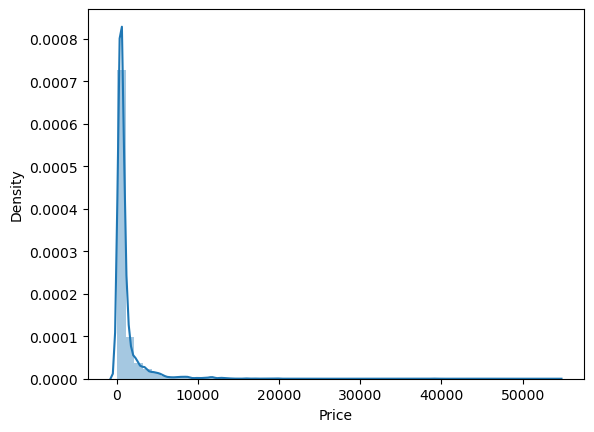

In [16]:
sns.distplot(df_noFuel['Price'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_20740\3345985692.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

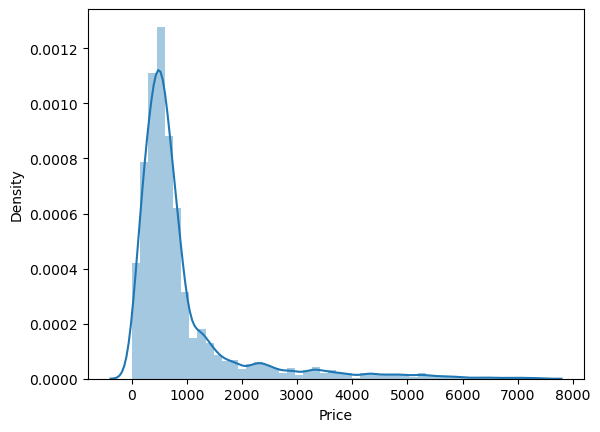

In [17]:

df1 = df_noFuel[df_noFuel['Price'] < df_noFuel['Price'].quantile(0.98)]
sns.distplot(df1['Price'])

In [18]:
df1["mileage"]

0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
           ...   
30647     55000.0
30648     28000.0
30649    158000.0
30650     30000.0
30651     10500.0
Name: mileage, Length: 29869, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_20740\349551231.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

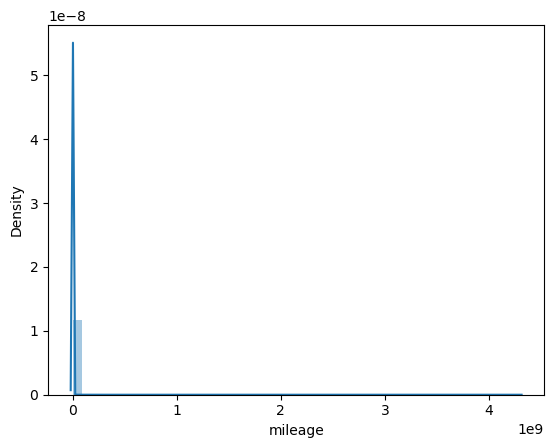

In [24]:
df1 = df1[df1['mileage'] != 0]
sns.distplot(df1['mileage'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_20740\133805168.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

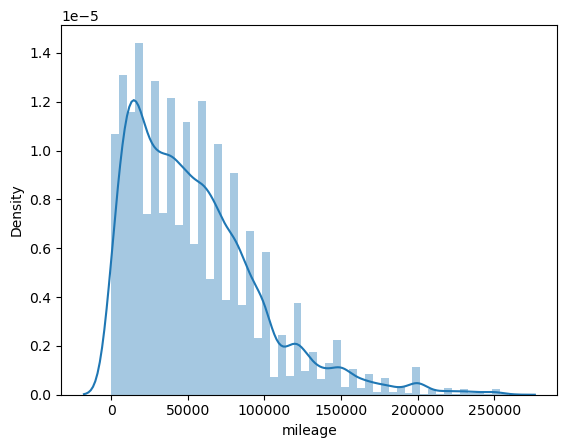

In [25]:
df2 = df1[df1['mileage'] < df1['mileage'].quantile(0.98)]
sns.distplot(df2['mileage'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_20740\1652347279.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['year_of_manufacture'])


<Axes: xlabel='year_of_manufacture', ylabel='Density'>

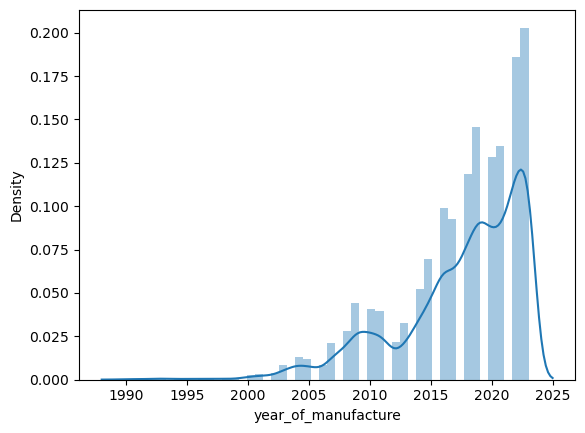

In [21]:
sns.distplot(df2['year_of_manufacture'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_20740\967550348.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['year_of_manufacture'])


<Axes: xlabel='year_of_manufacture', ylabel='Density'>

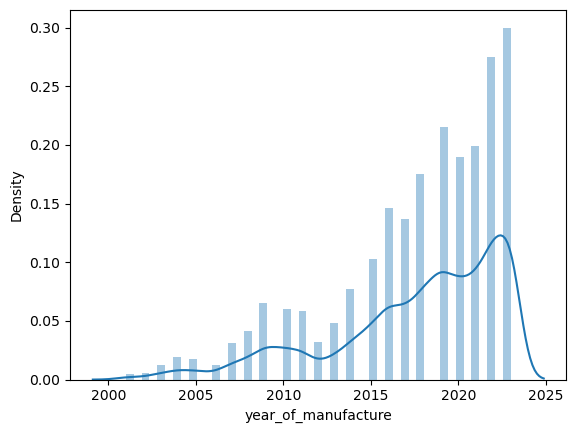

In [22]:
df3 = df2[df2['year_of_manufacture'] > 2000]
sns.distplot(df3['year_of_manufacture'])

In [23]:
data_cleaned = df3.reset_index(drop=True)
data_cleaned.to_csv('car_detail_cleaned.csv', index=False)  

In [26]:
data_cleaned.columns

Index(['origin', 'condition', 'car_model', 'mileage', 'exterior_color',
       'interior_color', 'num_of_doors', 'seating_capacity', 'engine',
       'transmission', 'drive_type', 'fuel_consumption', 'grade',
       'year_of_manufacture', 'car_name', 'Price'],
      dtype='object')

In [35]:
print(data_cleaned['exterior_color'].unique())

['White' 'Black' 'Silver' 'Copper' 'Grey' 'Red' 'Brown' 'Green'
 'Take note' 'Orange' 'Yellow' 'Sand' 'Colorful' 'Cream' 'Different color'
 'Pink' 'Violet' '-']


In [ ]:
for col in data_cleaned.columns:
    if col != 'Price' and col != 'mileage' and col != 'year_of_manufacture':
        data_cleaned[col].unique().to_csv(f'{col}_unique_values.csv', index=False)


['Domestic assembly' 'Imported']
['New car' 'Used car']
['Truck' 'SUV' 'Crossover' 'Van/Minivan' 'Bán tải / Pickup' 'Sedan'
 'Hatchback' 'Wagon' 'Coupe' 'Convertible/Cabriolet']
['White' 'Black' 'Silver' 'Copper' 'Grey' 'Red' 'Brown' 'Green'
 'Take note' 'Orange' 'Yellow' 'Sand' 'Colorful' 'Cream' 'Different color'
 'Pink' 'Violet' '-']
['gray' 'Black' 'Brown' 'Cream' 'Yellow' 'Colorful' 'Sand' 'Grey' 'Silver'
 'Green' '-' 'Red' 'Different color' 'White' 'Orange' 'Copper' 'Pink'
 'Violet']
['2-door' '5-door' '4-door' '6-door' '1-door' '3-door' '45-door' '44-door'
 '7-door' '54-door' '0-door']
['2-seat' '7-seat' '8-seat' '5-seat' '3-seat' '6-seat' '16-seat' '20-seat'
 '47-seat' '4-seat' '10-seat' '29-seat' '11-seat' '9-seat' '17-seat'
 '12-seat' '30-seat' '15-seat' '44-seat' '0-seat']
['Petrol\t1.0 L' 'Petrol\t3.4 L' 'Petrol\t2.0 L' 'Petrol\t1.8 L'
 'Petrol\t1.5 L' 'Petrol\t2.7 L' 'Diesel\t2.2 L' 'Diesel\t2.0 L'
 'Diesel\t2.4 L' 'Diesel\t11.1 L' 'Diesel' 'Petrol\t3.0 L' 'Petrol\t2.5 L